<a href="https://colab.research.google.com/github/amtulifra/text-summarizer/blob/main/TextSummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Importing libraries*

In [77]:
import bs4 as bs
import urllib.request as url
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import heapq
from string import punctuation


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [78]:
scraped_data = url.urlopen('https://en.wikipedia.org/wiki/Social_anxiety_disorder')
article = scraped_data.read()
parsed_article = bs.BeautifulSoup(article,'lxml')
paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:
    article_text += p.text

In [79]:
article_text

'Social anxiety disorder (SAD), also known as social phobia, is an anxiety disorder characterized by sentiments of fear and anxiety in social situations, causing considerable distress and impairing ability to function in at least some aspects of daily life.[4]:\u200a15\u200a These fears can be triggered by perceived or actual scrutiny from others. Individuals with social anxiety disorder fear negative evaluations from other people.\nPhysical symptoms often include excessive blushing, excessive sweating, trembling, palpitations, and nausea. Stammering may be present, along with rapid speech. Panic attacks can also occur under intense fear and discomfort. Some affected individuals may use alcohol or other drugs to reduce fears and inhibitions at social events. It is common for those with social phobia to self-medicate in this fashion, especially if they are undiagnosed, untreated, or both; this can lead to alcohol use disorder, eating disorders or other kinds of substance use disorders. 

Removing square brackets and extra spaces

In [80]:
article_text = re.sub(r'\[[0-9]*\]', ' ', article_text)
article_text = re.sub(r'\s+', ' ', article_text)

Removing special characters and digits

In [81]:
formatted_article_text = re.sub('[^a-zA-Z]', ' ', article_text )
formatted_article_text = re.sub(r'\s+', ' ', formatted_article_text)

In [82]:
sentence_list = nltk.sent_tokenize(article_text)

In [83]:
stopwords = nltk.corpus.stopwords.words('english')

In [84]:
word_frequencies = {}

for word in nltk.word_tokenize(formatted_article_text):
    if word not in stopwords and word not in punctuation:
        if word not in word_frequencies.keys():
            word_frequencies[word] = 1
        else:
            word_frequencies[word] += 1

In [85]:
word_frequencies

{'Social': 14,
 'anxiety': 114,
 'disorder': 87,
 'SAD': 19,
 'also': 27,
 'known': 4,
 'social': 154,
 'phobia': 41,
 'characterized': 1,
 'sentiments': 1,
 'fear': 17,
 'situations': 16,
 'causing': 1,
 'considerable': 1,
 'distress': 1,
 'impairing': 1,
 'ability': 4,
 'function': 1,
 'least': 2,
 'aspects': 1,
 'daily': 1,
 'life': 5,
 'These': 6,
 'fears': 6,
 'triggered': 2,
 'perceived': 2,
 'actual': 2,
 'scrutiny': 3,
 'others': 18,
 'Individuals': 2,
 'negative': 14,
 'evaluations': 2,
 'people': 20,
 'Physical': 1,
 'symptoms': 16,
 'often': 7,
 'include': 8,
 'excessive': 5,
 'blushing': 3,
 'sweating': 3,
 'trembling': 1,
 'palpitations': 2,
 'nausea': 4,
 'Stammering': 1,
 'may': 50,
 'present': 5,
 'along': 1,
 'rapid': 2,
 'speech': 3,
 'Panic': 1,
 'attacks': 3,
 'occur': 3,
 'intense': 2,
 'discomfort': 1,
 'Some': 7,
 'affected': 2,
 'individuals': 11,
 'use': 24,
 'alcohol': 16,
 'drugs': 8,
 'reduce': 2,
 'inhibitions': 1,
 'events': 2,
 'It': 8,
 'common': 6,
 'se

In [86]:
maximum_frequncy = max(word_frequencies.values())

for word in word_frequencies.keys():
    word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

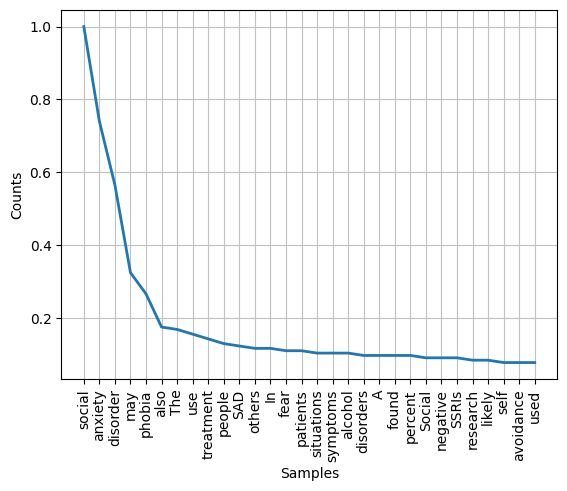

<Axes: xlabel='Samples', ylabel='Counts'>

In [87]:
frequency_dist = nltk.FreqDist(word_frequencies)
frequency_dist.plot(30)

In [88]:
sentence_scores = {}

for sent in sentence_list:
    for word in nltk.word_tokenize(sent.lower()):
        if word in word_frequencies.keys():
            if len(sent.split(' ')) < 30:
                if sent not in sentence_scores.keys():
                    sentence_scores[sent] = word_frequencies[word]
                else:
                    sentence_scores[sent] += word_frequencies[word]

In [89]:
sentence_scores

{': 15 These fears can be triggered by perceived or actual scrutiny from others.': 0.2142857142857143,
 'Individuals with social anxiety disorder fear negative evaluations from other people.': 2.720779220779221,
 'Physical symptoms often include excessive blushing, excessive sweating, trembling, palpitations, and nausea.': 0.3896103896103897,
 'Stammering may be present, along with rapid speech.': 0.3961038961038961,
 'Panic attacks can also occur under intense fear and discomfort.': 0.3831168831168831,
 'Some affected individuals may use alcohol or other drugs to reduce fears and inhibitions at social events.': 1.792207792207792,
 'SAD is sometimes referred to as an illness of lost opportunities where "individuals make major life choices to accommodate their illness".': 0.2532467532467533,
 'Standardized rating scales can be used to screen for social anxiety disorder and measure the severity of anxiety.': 3.194805194805195,
 'The first line of treatment for social anxiety disorder is 

In [90]:
summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
summary = ' '.join(summary_sentences)

In [91]:
summary

'DSM-5 defines Social Anxiety Disorder as a marked, or intense, fear or anxiety of social situations in which the individual may be scrutinized by others. Other researchers have found social phobia symptoms in patients treated with dopamine antagonists like haloperidol, emphasizing the role of dopamine neurotransmission in social anxiety disorder. a faux pas committed by someone), or verbal warnings of social problems and dangers, may also make the development of a social anxiety disorder more likely. The need for social acceptance or social standing has been elaborated in other lines of research relating to social anxiety. In cognitive models of social anxiety disorder, those with social phobias experience dread over how they will present to others. Social anxiety disorder is often linked to bipolar disorder and attention deficit hyperactivity disorder (ADHD) and some believe that they share an underlying cyclothymic-anxious-sensitive disposition. The DSM-IV gave social phobia the alt